# Prompting Strategies

## Least to Most

What is least to most prompting?

Least to Most prompting is a prompt strategy that helps Models to reason in order to solve complex tasks. The idea behind this prompting strategy is to break down the initial problem into smaller parts to be able to solve simpler steps to come to a conclusion.

Source: https://doi.org/10.48550/arXiv.2205.10625

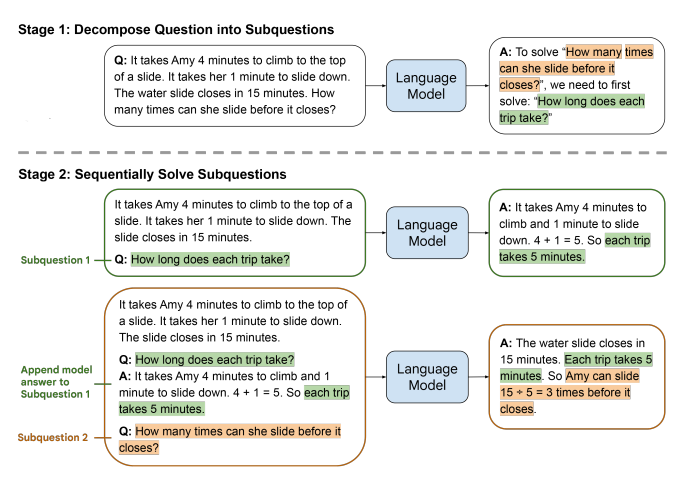

## Implementation of Least to Most Strategy (with Ollama)

In [ ]:
# Import Ollama as we are going to use their SDK for the chat messages
import ollama

In [ ]:
SYS_PROMPT = """
You are going to extract sub-questions that will help you break down a task into smaller parts to be able to provide a solution.
These sub-questions will need to be able to help you answer the final question. 
You will be given the context.
Only extract the sub-questions.
"""

In [5]:
context = "Elsa has 5 apples. Anna has 2 more apples than Elsa. How many apples do they have together?"

In [6]:
USR_PROMPT = f"""
Context: {context}
"""

In [ ]:
# Intermidiate step to extract sub-questions
responce = ollama.chat(
  model='llama3.2',
  messages=[
      {
        'role':'system',
        'content': SYS_PROMPT,
        'role': 'user', 
        'content': "You should extract the sub-questions" + USR_PROMPT,
        }
    ],
)
SUB_QUESTIONS = responce['message']['content']

In [ ]:
responce = ollama.chat(
  model='llama3.2',
  messages=[
      {
        'role':'system',
        'content': "You are given a task and a series of sub-questions which will help you find a solution to the task.\n First solve the sub-questions then use that knowledge to solve the whole task.",
        'role': 'user', 
        'content': "Task:" + context + "Sub-Questions:" + '\n' + SUB_QUESTIONS + "\nSolve the sub-questions and then tackle the whole task.",
        }
    ],
)
print(responce['message']['content'])

To solve the problem of how many apples Elsa and Anna have together, we need to first find out how many apples each of them has individually.

Sub-question 1: What is the number of apples Elsa has?

Answer: Elsa has 5 apples.

Sub-question 2: How many more apples does Anna have compared to Elsa?

Answer: Anna has 2 more apples than Elsa.

Since we already know that Elsa has 5 apples, we can add 2 to this number to find out how many apples Anna has. 

Sub-question 3: What is the total number of apples Anna has?

Answer: Since Anna has 2 more apples than Elsa and Elsa has 5 apples, we calculate:

Anna's apples = Elsa's apples + 2
= 5 + 2
= 7

So, Anna has 7 apples.

Now that we know how many apples each of them has, we can find out the total number of apples they have together by adding their individual counts.

Sub-question 4: How many apples do Elsa and Anna have together?

Answer: Since Elsa has 5 apples and Anna has 7 apples, the total number of apples they have is:

Total apples = E

## Query Translation (Multi-Query)

In RAG systems we rely heavily on semantic similarity search to retreive the right documents from the available sources. But what if the query is poorly written? That means that any retrieval we are trying to do possibly will have a negative impact on our system and the results will be bad. That is where Multi-Query execution and query translation comes in. We have the LLM compose similar questions to the one written by the user.

Source: [Boost your RAG Performance](https://towardsdatascience.com/5-proven-query-translation-techniques-to-boost-your-rag-performance-47db12efe971)

In [1]:
import ollama

PROMPT = """
You are an AI assistant that will help the user in certain tasks. You have the task to generate three different versions of the given user question to be able to retrieve relevant documents from a vector 
database. Your goal is to create different versions of the user question that will help the process of distance-based similarity search be achieved and to overcome the its limitations.
Provide only these questions separetely without any explation.
"""

In [2]:
# Intermidiate step to extract sub-questions
responce = ollama.chat(
  model='llama3.2',
  messages=[
      {
        'role': 'user', 
        'content': PROMPT + "\nHere is the question, perform the task." + "\nQuestion: " + "What is the effective date of the agreement?",
        }
    ],
)
print(responce['message']['content'])

1. Can you please provide me with information on the effective date of an agreement?
2. What was the agreed-upon effective date for this contract?
3. Is there a specified or implied effective date for this business partnership agreement?
